In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import copy

In [58]:
map = (4, 4)
nuc = [np.array([round(map[0]/2), round(map[1]/2)])]
all_mol = []
all_pos = []

In [59]:
class Molecule:
    def __init__(self):
        self.pos = [self.spawn()]
        
    def spawn(self):
        global all_mol
        while True:
            pos = np.array([round(map[0]/2), round(map[1]/2)])
            while all(pos == nuc[0]):
                pos = np.array([np.random.randint(0, map[0] + 1), np.random.randint(0, map[1] + 1)])
            if any([any([i.all() for i in pos == mol.pos]) for mol in all_mol]):
                continue
            return pos
        
    def cluster(self, index):
        i = 0
        while i < len(self.pos):
            self.merge_neighb(i, index)
            i += 1
        
    def merge_neighb(self, which_mol, index):
        global all_mol
        short_pos_list = [all_mol[i].pos for i in range(index + 1, len(all_mol))]
        neighb = [[(abs((self.pos[which_mol] - i)[0]) + abs((self.pos[which_mol] - i)[1])) == 1
                   for i in mol] for mol in short_pos_list]
        candidates = []
        for mol in range(0, len(neighb)):
            if any(neighb[mol]):
                candidates.append(mol + index + 1)
        candidates.reverse()
        for i in candidates:
            for j in all_mol[i].pos:
                self.pos.append(j)
            del all_mol[i]
            
    ####################################################################################
    
    def cluster_all(self, index):
        i = 0
        print(self.pos)
        while i != len(self.pos):
            print(i)
            self.merge_neighb_all(i, index)
            i += 1
            
    def merge_neighb_all(self, which_mol, index):
        global all_mol
        short_pos_list = [all_mol[i].pos for i in range(0, len(all_mol)) if i != index]
        print(short_pos_list, '\n')
        neighb = [[(abs((self.pos[which_mol] - i)[0]) + abs((self.pos[which_mol] - i)[1])) == 1
                   for i in mol] for mol in short_pos_list]
        candidates = []
        for mol in range(0, len(neighb)):
            if any(neighb[mol]):
                candidates.append(mol + 1)
        candidates.reverse()
        for i in candidates:
            for j in all_mol[i].pos:
                self.pos.append(j)
            del all_mol[i]
        
    def move(self):
        global all_pos
        if np.random.rand() > 0.5:
            dir = np.array([0, np.random.choice([-1, 1])])
        else:
            dir = np.array([np.random.choice([-1, 1]), 0])
        pot_pos = copy.deepcopy(self.pos)
        for i in pot_pos:
            i += dir
        if sum([any([any([i.all() for i in pos == mol.pos]) for pos in pot_pos]) for mol in all_mol]) <= 1:
            self.pos = pot_pos
        

In [60]:
# nicht gleich, sondern next to
def merge_nucleus(nuc, all_mol):
    for mol in all_mol:
        for pos_mol in mol.pos:
            for pos in nuc: 
                if (abs(pos[0] - pos_mol[0]) + abs(pos[1] - pos_mol[1])) == 1:
                    [nuc.append(i) for i in mol.pos]
                    del all_mol[all_mol.index(mol)]
                    return

In [61]:
# Visualisiert die Moleküle
def plot():
    print(len(all_pos))
    plt.figure(figsize=(4, 4))
    plt.plot(*np.array([item for sublist in all_pos for item in sublist]).T, 'bs', *np.array(nuc).T, 'rs', *np.array(all_pos[0]).T, 'gs')
    #plt.scatter(*np.array([item for sublist in nuc for item in sublist]).T, marker = 's')
    #plt.axis([-1, map[0]+1, -1, map[0]+1])
    plt.show()

In [62]:
def cluster(all_mol):
    i = 0
    while i < len(all_mol):
        all_mol[i].cluster(i)
        i += 1
        
def step(all_mol):
    i = 0
    while i < len(all_mol):
        all_mol[i].move()
        all_mol[i].cluster_all(i)
        i += 1

In [63]:
def pos_list(all_pos):
    all_pos.clear()
    for mol in all_mol:
        all_pos.append(mol.pos)

In [88]:
# spawnt alles Moleküle

all_mol = []

for i in range(15):
    new_mol = Molecule()
    all_mol.append(new_mol)

In [89]:
# vereint benachbarte Moleküle

cluster(all_mol)

In [90]:
nuc = [np.array([round(map[0]/2), round(map[1]/2)])]
pos_list(all_pos)

In [97]:
pos_list(all_pos)
all_pos

[[array([5, 4]),
  array([5, 3]),
  array([4, 4]),
  array([4, 3]),
  array([5, 2]),
  array([3, 3]),
  array([4, 2]),
  array([5, 1]),
  array([2, 3]),
  array([5, 0]),
  array([1, 3]),
  array([2, 4]),
  array([1, 2])],
 [array([1, 1]),
  array([2, 1]),
  array([1, 1]),
  array([2, 1]),
  array([1, 1]),
  array([2, 1]),
  array([1, 1]),
  array([2, 1]),
  array([1, 1]),
  array([2, 1]),
  array([1, 1]),
  array([2, 1]),
  array([1, 1]),
  array([2, 1]),
  array([1, 1]),
  array([2, 1]),
  array([1, 1]),
  array([2, 1]),
  array([1, 1]),
  array([2, 1]),
  array([1, 1]),
  array([2, 1]),
  array([1, 1]),
  array([2, 1]),
  array([1, 1]),
  array([2, 1]),
  array([1, 1]),
  array([2, 1]),
  array([1, 1]),
  array([2, 1]),
  array([1, 1]),
  array([2, 1]),
  array([1, 1]),
  array([2, 1]),
  array([1, 1]),
  array([2, 1]),
  array([1, 1]),
  array([2, 1]),
  array([1, 1]),
  array([2, 1]),
  array([1, 1]),
  array([2, 1]),
  array([1, 1]),
  array([2, 1]),
  array([1, 1]),
  array([2, 1

2


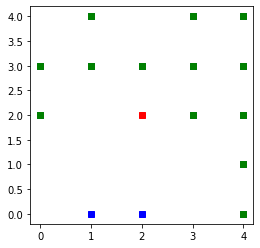

In [92]:
plot()

In [84]:
merge_nucleus(nuc, all_mol)
pos_list(all_pos)
nuc

[array([2, 2]),
 array([2, 1]),
 array([2, 0]),
 array([3, 1]),
 array([3, 0]),
 array([3, 2]),
 array([4, 0]),
 array([4, 2])]

In [93]:
pos_list(all_pos)
len(all_pos)

2

In [ ]:
for i in range(1):
    clear_output(wait=True)
    step(all_mol)
    pos_list(all_pos)
    plot()